In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Grayscale

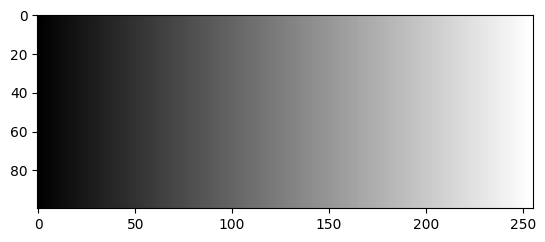

In [2]:
im = np.arange(256)
im = im[np.newaxis, :]
im = np.repeat(im, 100, axis=0)
plt.imshow(im, cmap='gray')

# Processing Grayscale images

In [3]:
im = plt.imread('./data/albert-einstein_gray.jpg')

In [4]:
type(im)

numpy.ndarray

In [5]:
im.shape

(949, 728)

In [6]:
im.dtype

dtype('uint8')

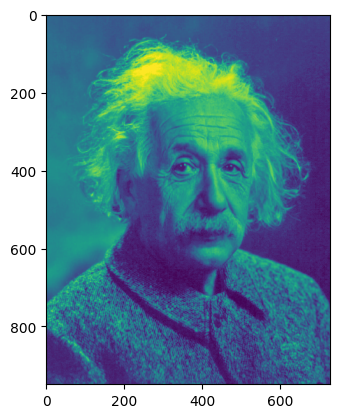

In [7]:
plt.imshow(im)

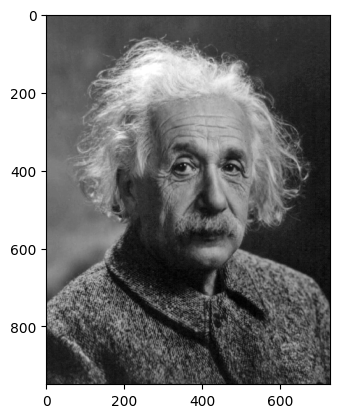

In [8]:
plt.imshow(im, cmap='gray')

In [9]:
im

array([[85, 85, 85, ..., 62, 62, 62],
       [85, 85, 85, ..., 64, 65, 64],
       [85, 85, 85, ..., 59, 59, 58],
       ...,
       [36, 42, 42, ..., 36, 42, 47],
       [29, 37, 37, ..., 36, 43, 44],
       [33, 40, 37, ..., 35, 43, 42]], dtype=uint8)

In [10]:
im[23, 300]

70

In [11]:
im[23:100, 40:100] = 255

ValueError: assignment destination is read-only

In [12]:
im[23, 100] = 200

ValueError: assignment destination is read-only

In [13]:
im2 = im.copy()

In [14]:
im2[23, 100] = 200

In [15]:
im2[23:100, 40:100] = 255

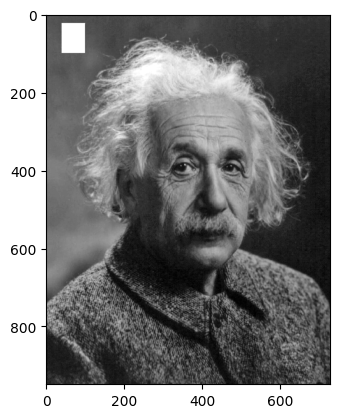

In [16]:
plt.imshow(im2, cmap='gray')

In [17]:
im2[300:400, 40:100] = 0

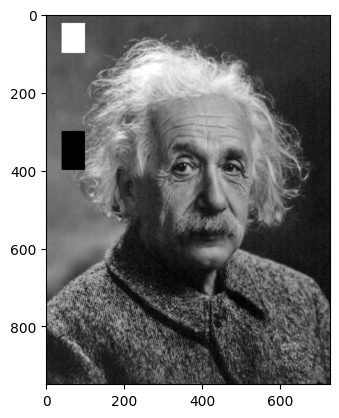

In [18]:
plt.imshow(im2, cmap='gray')

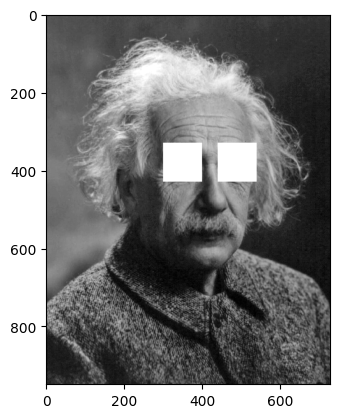

In [19]:
im = plt.imread('./data/albert-einstein_gray.jpg')
im3 = im.copy()

im3[330:430, 300:400] = 255  #for left eye
im3[330:430, 440:540] = 255  #for right eye

plt.imshow(im3, cmap='gray')

In [20]:
# plt.imsave('./data/albert-einstein_gray_modified.jpg',im2,cmap='gray')

# Grayscale Images in OpenCV

In [21]:
import cv2

In [22]:
img = cv2.imread('./data/albert-einstein_gray.jpg', cv2.IMREAD_GRAYSCALE)

In [23]:
type(img)

numpy.ndarray

In [24]:
img.dtype

dtype('uint8')

In [25]:
img.shape

(949, 728)

In [26]:
img[23, 100] = 200

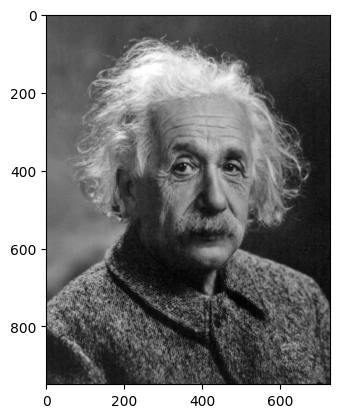

In [27]:
plt.imshow(img, cmap='gray')

In [28]:
# cv2.imshow('Gray', img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [29]:
img[500:700, 500:600] = 255

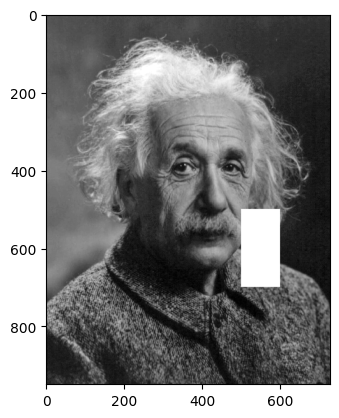

In [30]:
plt.imshow(img, cmap='gray')

In [31]:
# cv2.imshow('Gray',img)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

In [32]:
# cv2.imwrite('./data/albert-einstein_gray_opencv.jpg',img)

# RGB Images

In [33]:
cim = plt.imread('./data/tulips.jpg')

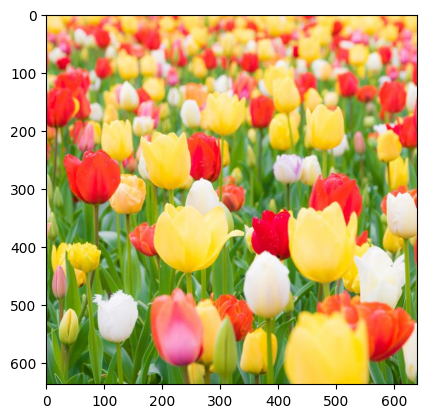

In [34]:
plt.imshow(cim)

In [35]:
cim.shape

(638, 640, 3)

In [36]:
type(cim)

numpy.ndarray

In [37]:
cim.dtype

dtype('uint8')

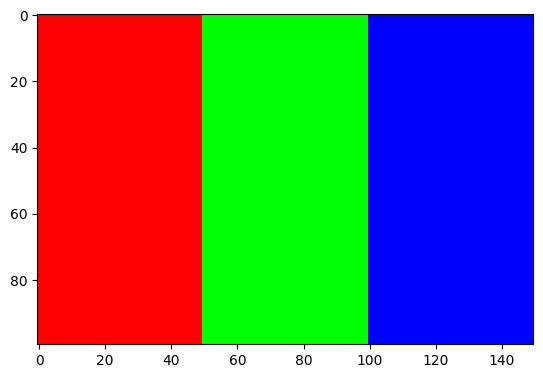

In [38]:
# Solution to Quiz 03_06
rgb = np.zeros((100, 150, 3), dtype='uint8')
rgb[:, 0:50, 0] = 255  # red
rgb[:, 50:100, 1] = 255  #green
rgb[:, 100:150, 2] = 255  #blue

plt.imshow(rgb)

In [39]:
# cv2.imshow('RGB',rgb)
# cv2.waitKey(0)
# cv2.destroyAllWindows()

# OpenCV reads as BGR

In [40]:
cim = cv2.imread('./data/tulips.jpg')
cim = cim[:, :, ::-1]
R = cim[:, :, 0]
G = cim[:, :, 1]
B = cim[:, :, 2]

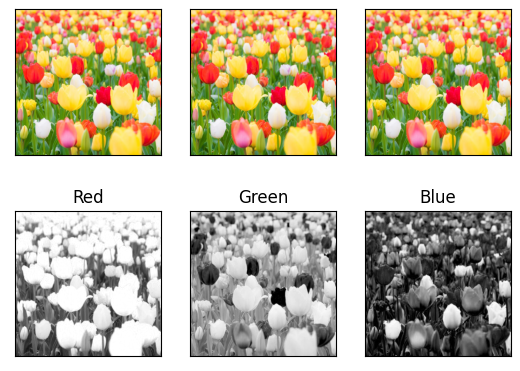

In [41]:
plt.figure(1)

plt.subplot(231)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(R, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Red')

plt.subplot(235)
plt.imshow(G, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Green')

plt.subplot(236)
plt.imshow(B, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Blue')
plt.show()

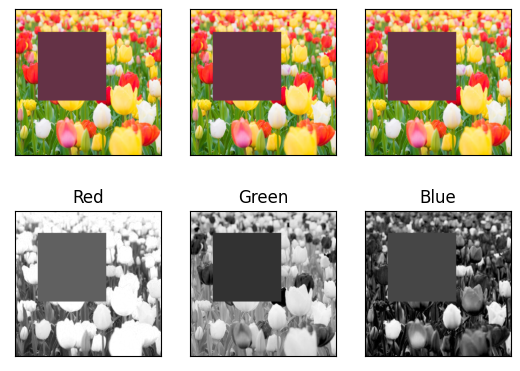

In [42]:
R[100:400, 100:400] = 100
G[100:400, 100:400] = 50
B[100:400, 100:400] = 70
cim[:, :, 0] = R
cim[:, :, 1] = G
cim[:, :, 2] = B

plt.figure(1)

plt.subplot(231)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(232)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(233)
plt.imshow(cim)
plt.xticks([])
plt.yticks([])

plt.subplot(234)
plt.imshow(R, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Red')

plt.subplot(235)
plt.imshow(G, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Green')

plt.subplot(236)
plt.imshow(B, cmap='gray')
plt.xticks([])
plt.yticks([])
plt.title('Blue')
plt.show()

# RGB to HSV conversion

In [43]:
def f_rgb_to_hsv(r, g, b, scaleFactor):
    r, g, b = r / 255.0, g / 255.0, b / 255.0
    cmax = max(r, g, b)  # maximum of r, g, b
    cmin = min(r, g, b)  # minimum of r, g, b
    diff = cmax - cmin  # diff of cmax and cmin.
    if cmax == cmin:
        h = 0
    elif cmax == r:
        h = (60 * ((g - b) / diff) + 0) % 360
    elif cmax == g:
        h = (60 * ((b - r) / diff) + 120) % 360
    elif cmax == b:
        h = (60 * ((r - g) / diff) + 240) % 360

    if h < 0:
        h = h + 360
    if cmax == 0:
        s = 0
    else:
        s = (diff / cmax) * scaleFactor
    v = cmax * scaleFactor
    return h, s, v

In [44]:
print(f_rgb_to_hsv(100, 200, 50, 100))

(100.0, 75.0, 78.43137254901961)


In [45]:
im = cv2.imread('./data/tulips.jpg')

In [46]:
HsvIm = cv2.cvtColor(im, cv2.COLOR_BGR2HSV)
cv2.cvtColor(im, cv2.COLOR_HSV2BGR)

array([[[209,  28, 255],
        [224,  27, 255],
        [232,  27, 255],
        ...,
        [224, 249,  66],
        [199, 246,  70],
        [163, 243,  73]],

       [[209,  28, 255],
        [224,  27, 255],
        [232,  27, 255],
        ...,
        [255, 209,  57],
        [254, 247,  62],
        [220, 251,  65]],

       [[232,  29, 255],
        [232,  29, 255],
        [239,  29, 255],
        ...,
        [255, 137,  47],
        [255, 174,  52],
        [255, 208,  55]],

       ...,

       [[ 25,  39,  46],
        [ 25,  38,  46],
        [ 26,  38,  48],
        ...,
        [120, 109,  43],
        [ 90,  98,  41],
        [ 72,  87,  39]],

       [[ 25,  40,  45],
        [ 25,  39,  46],
        [ 26,  38,  48],
        ...,
        [115, 105,  41],
        [ 93,  97,  41],
        [ 79,  88,  39]],

       [[ 25,  38,  44],
        [ 25,  40,  46],
        [ 27,  39,  49],
        ...,
        [114,  96,  41],
        [ 98,  94,  40],
        [ 88,  90,  39]]

In [47]:
type(HsvIm)

numpy.ndarray

In [48]:
HsvIm.shape

(638, 640, 3)

In [49]:
img = cv2.imread('./data/tulips.jpg')

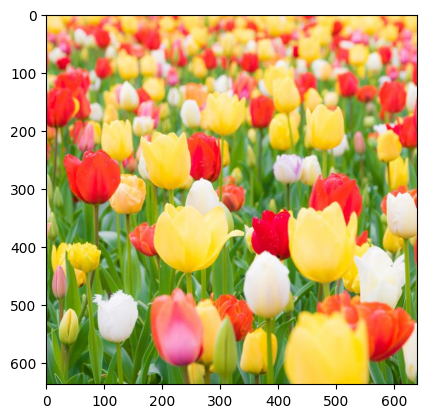

In [50]:
plt.imshow(img[:, :, ::-1])

In [51]:
hsv = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)

In [52]:
lr = np.array([0, 120, 70])
ur = np.array([8, 255, 255])
mask1 = cv2.inRange(hsv, lr, ur)

In [53]:
type(mask1)

numpy.ndarray

In [54]:
mask1.dtype

dtype('uint8')

In [55]:
mask1.shape

(638, 640)

In [56]:
mask1.max()

255

In [57]:
mask1.min()

0

In [58]:
lr = np.array([170, 120, 70])
ur = np.array([180, 255, 255])
mask2 = cv2.inRange(hsv, lr, ur)

In [59]:
np.unique(mask2)

array([  0, 255], dtype=uint8)

In [60]:
np.unique(mask1)

array([  0, 255], dtype=uint8)

In [61]:
mask = mask1 | mask2

In [62]:
np.unique(mask)

array([  0, 255], dtype=uint8)

In [63]:
res = cv2.bitwise_and(img, img, mask=mask)

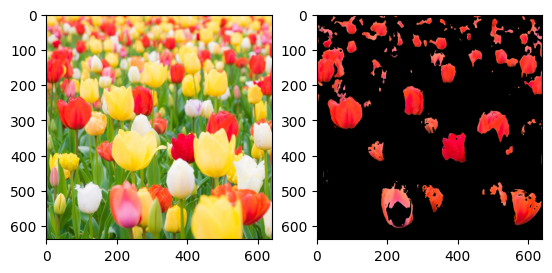

In [64]:
plt.figure(1)
plt.subplot(121)
plt.imshow(img[:, :, ::-1])
plt.subplot(122)
plt.imshow(res[:, :, ::-1])
plt.show()

In [65]:
# solution to quiz
lr = np.array([20, 100, 100])
ur = np.array([30, 255, 255])
yellow_mask = cv2.inRange(hsv, lr, ur)
res = cv2.bitwise_and(img, img, mask=yellow_mask)

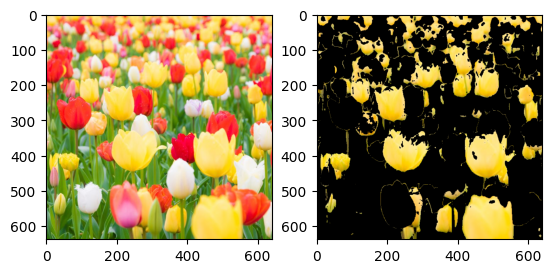

In [66]:
plt.figure(1)
plt.subplot(121)
plt.imshow(img[:, :, ::-1])
plt.subplot(122)
plt.imshow(res[:, :, ::-1])
plt.show()